In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Load CSV file - replace with your path
df = pd.read_csv('/content/SHFE Stainless Steel Futures Historical Data.csv')

In [ ]:
# Step 1: Rename columns
df.columns = ['Date', 'Price_YUAN', 'Price_INR', 'Open', 'High', 'Low', 'Volume', 'Change_Pct']

# Step 2: Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)

# Step 3: Convert relevant columns from strings with commas to floats
for col in ['Price_YUAN', 'Price_INR', 'Open', 'High', 'Low']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False).astype(float)

# Step 4: Convert 'Volume' strings like "180.80K" to float
df['Volume'] = df['Volume'].astype(str).str.replace('K', '', regex=False).astype(float) * 1000

# Step 5: Convert 'Change_Pct' from percentage string to float
df['Change_Pct'] = df['Change_Pct'].astype(str).str.replace('%', '', regex=False).astype(float)


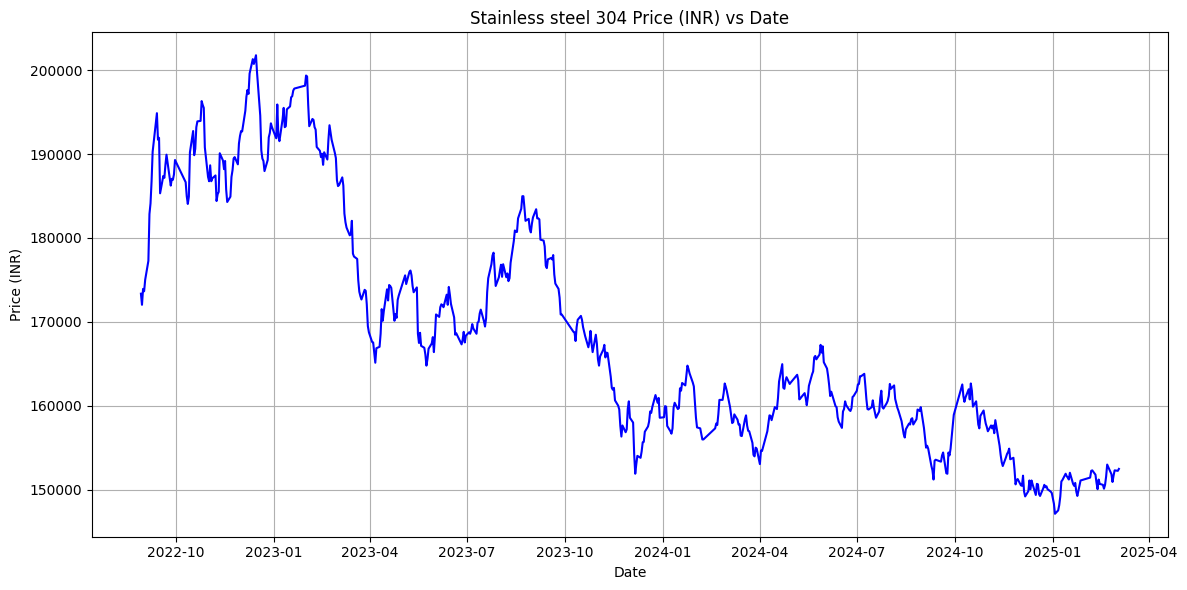

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_INR'], linestyle='-', color='blue')  # no marker
plt.title('Stainless steel 304 Price (INR) vs Date')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


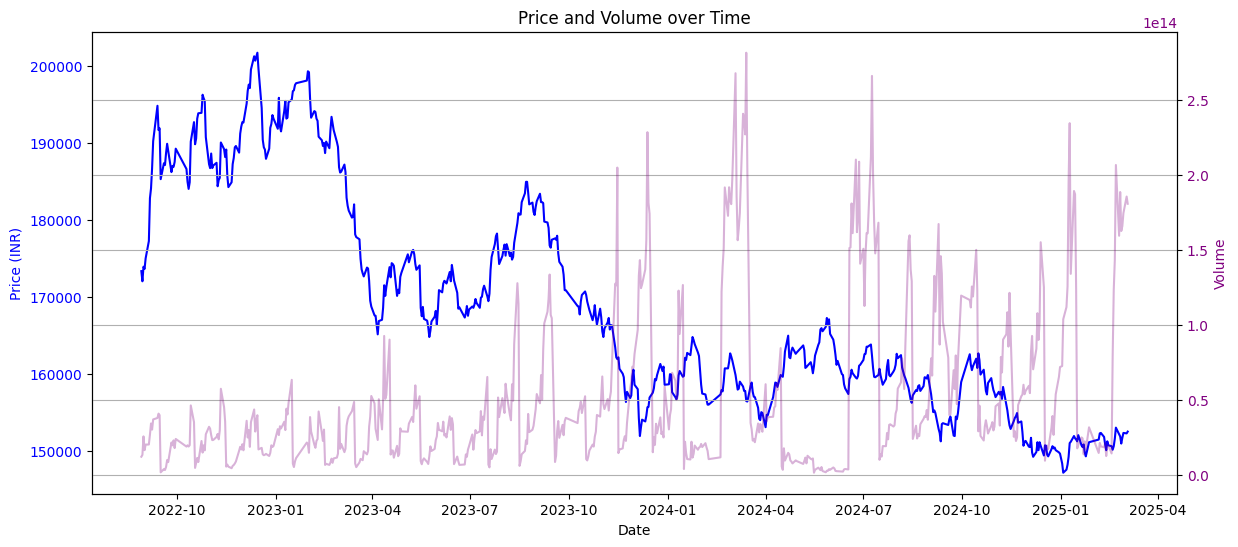

In [ ]:
# 2. Price and Volume on twin axes
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (INR)', color='blue')
ax1.plot(df['Date'], df['Price_INR'], color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='purple')
ax2.plot(df['Date'], df['Volume'], color='purple', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='purple')

plt.title('Price and Volume over Time')
plt.grid(True)
plt.show()

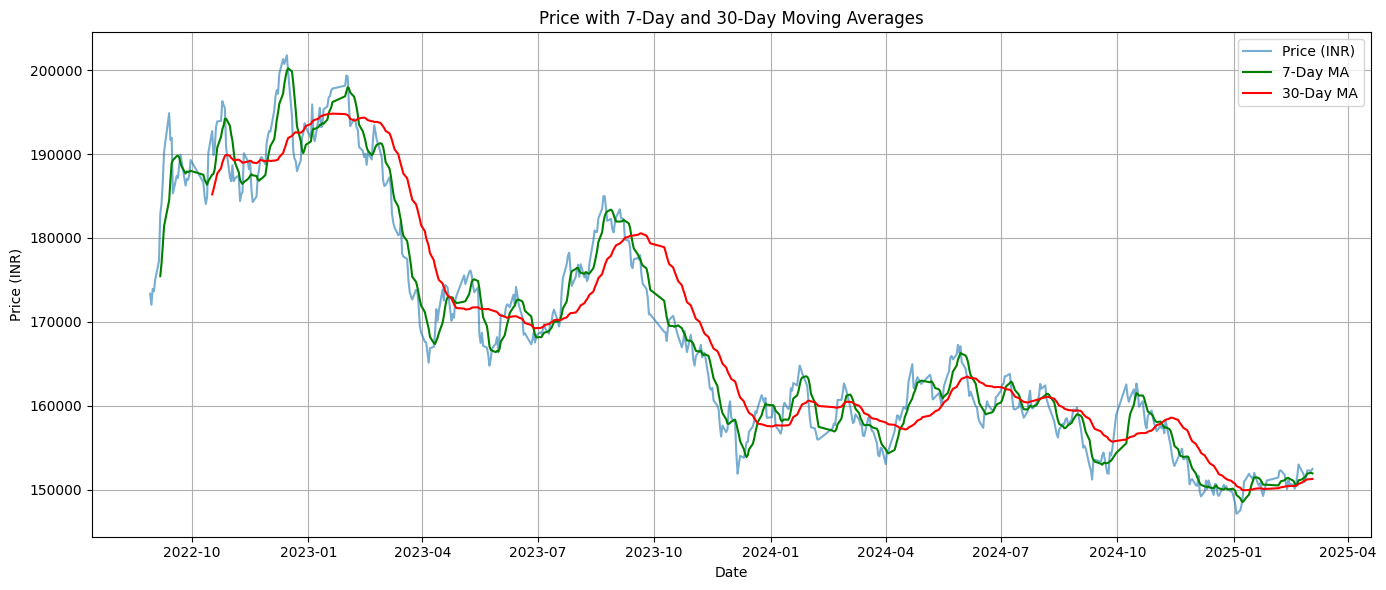

In [ ]:
# Calculate 7-day and 30-day moving averages
df['MA7'] = df['Price_INR'].rolling(window=7).mean()
df['MA30'] = df['Price_INR'].rolling(window=30).mean()

# Plot Price and both Moving Averages
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price_INR'], label='Price (INR)', alpha=0.6)
plt.plot(df['Date'], df['MA7'], label='7-Day MA', color='green')
plt.plot(df['Date'], df['MA30'], label='30-Day MA', color='red')
plt.title('Price with 7-Day and 30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


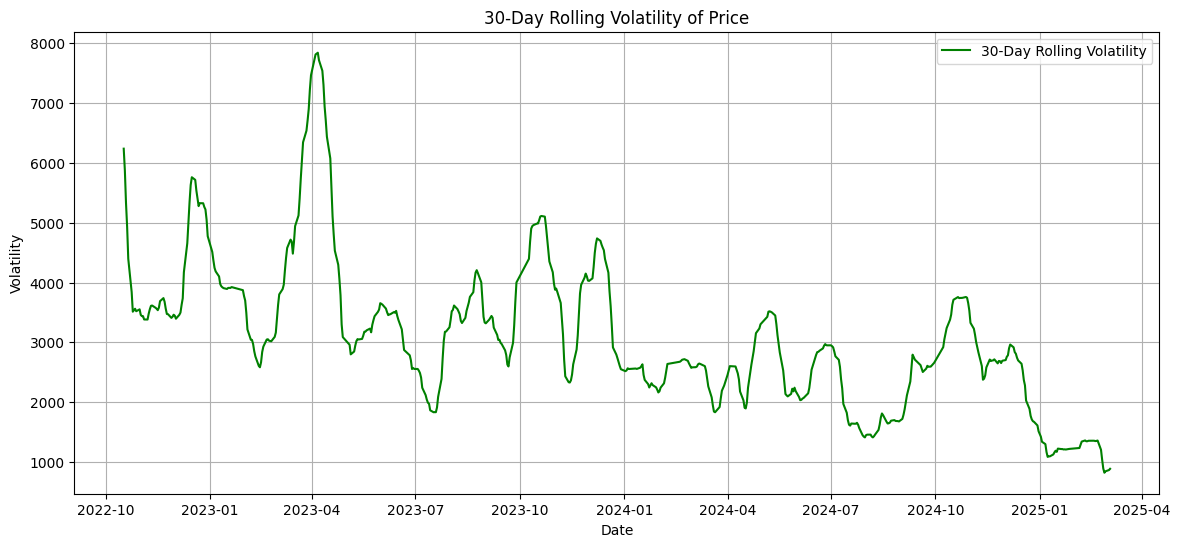

In [ ]:
# 2. Calculate rolling standard deviation (volatility)
df['Volatility30'] = df['Price_INR'].rolling(window=30).std()


# Plot rolling volatility
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volatility30'], label='30-Day Rolling Volatility', color='green')
plt.title('30-Day Rolling Volatility of Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

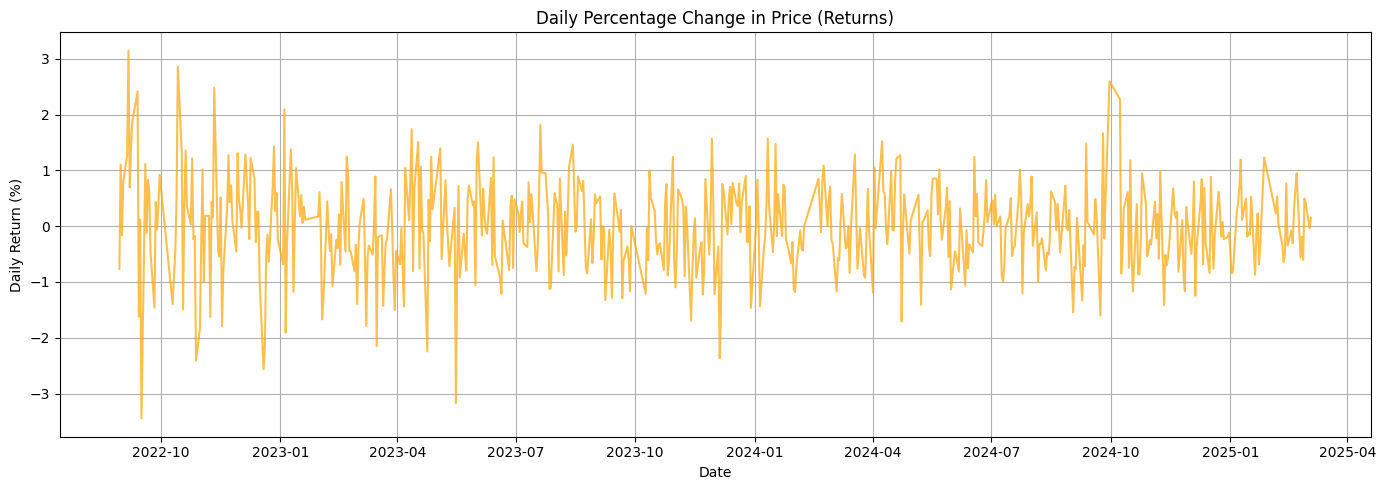

In [ ]:
df['Daily_Return'] = df['Price_INR'].pct_change() * 100  # in %
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Daily_Return'], color='orange', alpha=0.7)
plt.title('Daily Percentage Change in Price (Returns)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


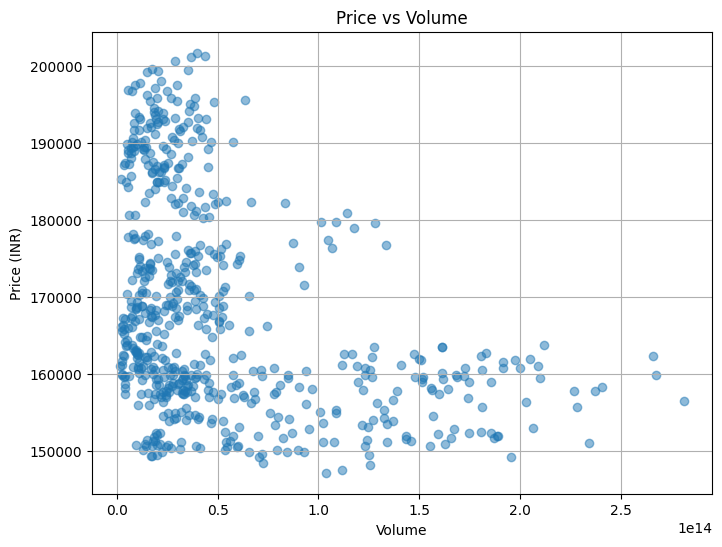

In [ ]:
# 2. Scatter plot Price vs Volume
plt.figure(figsize=(8,6))
plt.scatter(df['Volume'], df['Price_INR'], alpha=0.5)
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.show()

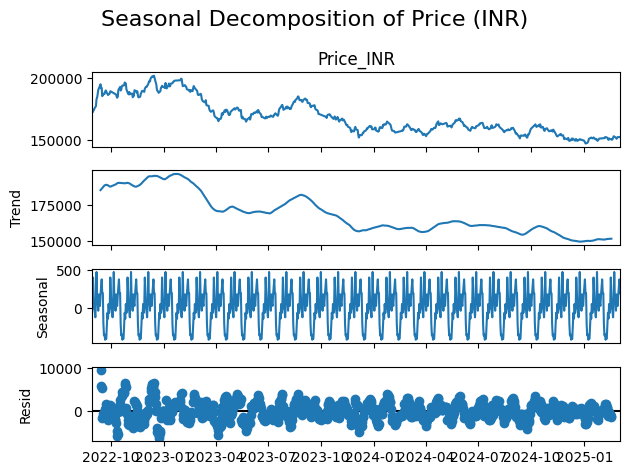

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index with daily frequency
df_decomp = df.set_index('Date').asfreq('D')

# Fill missing prices using linear interpolation
df_decomp['Price_INR'] = df_decomp['Price_INR'].interpolate(method='linear')

# Perform seasonal decomposition (additive model)
result = seasonal_decompose(df_decomp['Price_INR'], model='additive', period=30)  # 30 = approx monthly

# Plot the decomposed components
result.plot()
plt.suptitle('Seasonal Decomposition of Price (INR)', fontsize=16)
plt.tight_layout()
plt.show()


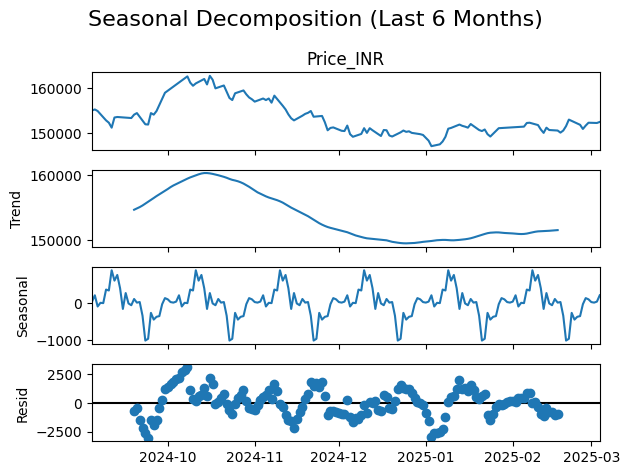

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Filter last 6 months of data
last_date = df['Date'].max()
six_months_ago = last_date - pd.DateOffset(months=6)
df_recent = df[df['Date'] >= six_months_ago].copy()

# Step 2: Set Date as index with daily frequency
df_recent = df_recent.set_index('Date').asfreq('D')

# Step 3: Interpolate missing values in Price_INR
df_recent['Price_INR'] = df_recent['Price_INR'].interpolate(method='linear')

# Step 4: Perform seasonal decomposition
# Use period=30 to assume monthly seasonality in daily data
result = seasonal_decompose(df_recent['Price_INR'], model='additive', period=30)

# Step 5: Plot decomposition
result.plot()
plt.suptitle('Seasonal Decomposition (Last 6 Months)', fontsize=16)
plt.tight_layout()
plt.show()


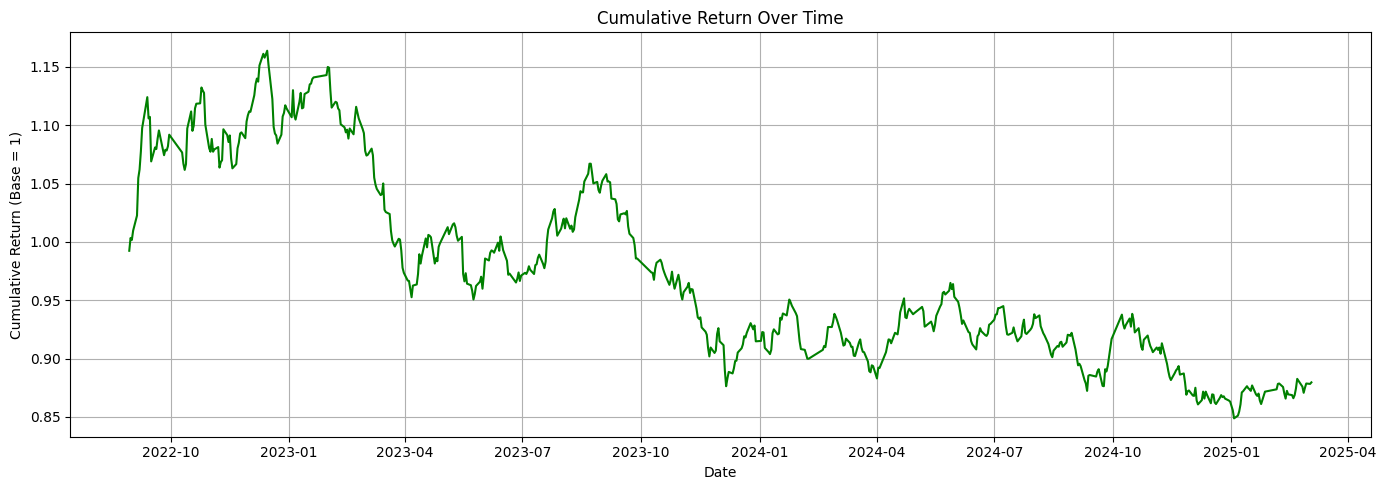

In [ ]:
df['Cumulative_Return'] = (1 + df['Daily_Return'] / 100).cumprod()

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Cumulative_Return'], color='green')
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Base = 1)')
plt.grid(True)
plt.tight_layout()
plt.show()
